## 2.  Modeling and Evaluation

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from mlxtend.preprocessing import DenseTransformer
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, roc_auc_score, recall_score,
    precision_score, f1_score, classification_report, RocCurveDisplay)

# DenseTransformer Source: https://rasbt.github.io/mlxtend/user_guide/preprocessing/DenseTransformer/

In [2]:
# Read in data scraped from Reddit

dvr = pd.read_csv('./datasets/rep_vs_dem.csv')
dvr.drop(columns = 'Unnamed: 0', inplace = True)
dvr.head()

,title,domain,author,upvote_ratio,id,created_utc,subreddit
0,"Taylor Swift could save Joe Biden in 2024. No,...",msnbc.com,Gamecat93,0.92,18y4ejv,Wed Jan 3 20:38:17 2024,democrats
1,The Polls Prove It: Many Republicans Love Fascism,newrepublic.com,audiomuse1,0.93,18y3f93,Wed Jan 3 19:48:29 2024,democrats
2,A Far-Right Court Just Admitted a Truth That A...,slate.com,wenchette,0.97,18xxec5,Wed Jan 3 15:19:27 2024,democrats
3,Trump Asks Supreme Court to Keep Him on Colora...,nytimes.com,StandStillLaddie,0.92,18xw4gq,Wed Jan 3 14:28:20 2024,democrats
4,"Donald Trump ""missing"" from Nevada ballot enra...",newsweek.com,vincevega87,0.98,18y80vn,Thu Jan 4 00:13:25 2024,democrats


In [3]:
# Create X and y variables

X = dvr['title']
y = dvr['subreddit']

In [4]:
# Calculate baseline 

y.value_counts(normalize = True)

subreddit
Republican    0.513898
democrats     0.486102
Name: proportion, dtype: float64

In [5]:
# Split data into test and train sets
# Target classes are balanced, no need to stratify
# Utilizing default training size of 0.75 due to relatively small data set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42)

In [6]:
X_train.shape

(1106,)

In [7]:
y_train.shape

(1106,)

# Modeling
Evaluate three models (Logistic Regression, Naive-Bayes Multinomial, Random Forest) with CountVectorizer and TfidVectorizer transformers, adjusting hyperparameters as required, to identify the best pipeline for production use.

In [8]:
# Instantiate pipelines 

# CountVectorizer Logistic Regression pipeline
cv_lr_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('to_dense', DenseTransformer()),
    ('logr', LogisticRegression())
])

# CountVectorizer MultinomialNB pipeline
cv_nb_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('to_dense', DenseTransformer()),
    ('nb', MultinomialNB())
])

# CountVectorizer RandomForest pipeline
cv_rf_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('to_dense', DenseTransformer()),
    ('rf', RandomForestClassifier())
])

# TfidVectorizer Logistic Regression pipeline
tf_lr_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('to_dense', DenseTransformer()),
    ('logr', LogisticRegression())
])

# TfidVectorizer MultinomialNB pipeline
tf_nb_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('to_dense', DenseTransformer()),
    ('nb', MultinomialNB())
])

# TfidVectorizer RandomForest pipeline
tf_rf_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('to_dense', DenseTransformer()),
    ('rf', RandomForestClassifier())
])

In [9]:
# Set parameters for each pipeline

# CountVectorizer Logistic Regression pipeline parameters
cv_lr_pipe_params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [2],
    'cvec__ngram_range': [(1, 2), (1, 3), (1, 4)],
    'logr__C': [0.3, 0.5, 0.7],
    'logr__penalty': ['l1', 'l2']
}

# CountVectorizer MultinomialNB pipeline parameters
cv_nb_pipe_params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [2],
    'cvec__ngram_range': [(1, 2), (1, 3), (1, 4)],
    'nb__alpha': [1.0, 2.0, 3.0]
}

# CountVectorizer RandomForest pipeline parameters
cv_rf_pipe_params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [2],
    'cvec__ngram_range': [(1, 2), (1, 3), (1, 4)],
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [None, 10]
}

# TfidVectorizer Logistic Regression pipeline parameters
tf_lr_pipe_params = {
    'tvec__stop_words': [None, 'english'],
    'tvec__max_features': [2500, 3000, 3500],
    'tvec__min_df': [2],
    'tvec__ngram_range': [(1, 2), (1, 3), (1, 4)],
    'logr__C': [0.3, 0.5, 0.7],
    'logr__penalty': ['l1', 'l2']
}

# TfidVectorizer MultinomialNB pipeline parameters
tf_nb_pipe_params = {
    'tvec__stop_words': [None, 'english'],
    'tvec__max_features': [2500, 3000, 3500],
    'tvec__min_df': [2],
    'tvec__ngram_range': [(1, 2), (1, 3), (1, 4)],
    'nb__alpha': [1.0, 2.0, 3.0]
}

# TfidVectorizer RandomForest pipeline parameters
tf_rf_pipe_params = {
    'tvec__stop_words': [None, 'english'],
    'tvec__max_features': [2500, 3000, 3500],
    'tvec__min_df': [2],
    'tvec__ngram_range': [(1, 2), (1, 3), (1, 4)],
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [None, 10]
}

## Instantiate GridSearchCV objects

In [10]:
cv_lr_gs = GridSearchCV(cv_lr_pipe,
                       cv_lr_pipe_params,
                       cv = 5)

cv_nb_gs = GridSearchCV(cv_nb_pipe,
                       cv_nb_pipe_params,
                       cv = 5)

cv_rf_gs = GridSearchCV(cv_rf_pipe,
                       cv_rf_pipe_params,
                       cv = 5)

tf_lr_gs = GridSearchCV(tf_lr_pipe,
                       tf_lr_pipe_params,
                       cv = 5)

tf_nb_gs = GridSearchCV(tf_nb_pipe,
                       tf_nb_pipe_params,
                       cv = 5)

tf_rf_gs = GridSearchCV(tf_rf_pipe,
                       tf_rf_pipe_params,
                       cv = 5)

## Fit train data to each gridsearch

In [11]:
cv_lr_gs.fit(X_train, y_train)

/Users/JR/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/JR/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/JR/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/JR/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 420, in fit
  

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('to_dense', DenseTransformer()),
                                       ('logr', LogisticRegression())]),
             param_grid={'cvec__max_features': [2500, 3000, 3500],
                         'cvec__min_df': [2],
                         'cvec__ngram_range': [(1, 2), (1, 3), (1, 4)],
                         'cvec__stop_words': [None, 'english'],
                         'logr__C': [0.3, 0.5, 0.7],
                         'logr__penalty': ['l1', 'l2']})

In [12]:
cv_nb_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('to_dense', DenseTransformer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_features': [2500, 3000, 3500],
                         'cvec__min_df': [2],
                         'cvec__ngram_range': [(1, 2), (1, 3), (1, 4)],
                         'cvec__stop_words': [None, 'english'],
                         'nb__alpha': [1.0, 2.0, 3.0]})

In [13]:
cv_rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('to_dense', DenseTransformer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'cvec__max_features': [2500, 3000, 3500],
                         'cvec__min_df': [2],
                         'cvec__ngram_range': [(1, 2), (1, 3), (1, 4)],
                         'cvec__stop_words': [None, 'english'],
                         'rf__max_depth': [None, 10],
                         'rf__n_estimators': [50, 100, 150]})

In [14]:
tf_lr_gs.fit(X_train, y_train)

/Users/JR/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/JR/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/JR/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/JR/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 420, in fit
  

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('to_dense', DenseTransformer()),
                                       ('logr', LogisticRegression())]),
             param_grid={'logr__C': [0.3, 0.5, 0.7],
                         'logr__penalty': ['l1', 'l2'],
                         'tvec__max_features': [2500, 3000, 3500],
                         'tvec__min_df': [2],
                         'tvec__ngram_range': [(1, 2), (1, 3), (1, 4)],
                         'tvec__stop_words': [None, 'english']})

In [15]:
tf_nb_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('to_dense', DenseTransformer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [1.0, 2.0, 3.0],
                         'tvec__max_features': [2500, 3000, 3500],
                         'tvec__min_df': [2],
                         'tvec__ngram_range': [(1, 2), (1, 3), (1, 4)],
                         'tvec__stop_words': [None, 'english']})

In [16]:
tf_rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('to_dense', DenseTransformer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [None, 10],
                         'rf__n_estimators': [50, 100, 150],
                         'tvec__max_features': [2500, 3000, 3500],
                         'tvec__min_df': [2],
                         'tvec__ngram_range': [(1, 2), (1, 3), (1, 4)],
                         'tvec__stop_words': [None, 'english']})

## Optimize Model Hyper-Parameters

---
#### Iteration 1 Hyper-Parameters

'cvec__stop_words': ['english']<br>
'cvec__max_features': [3000, 5000]<br>
'cvec__min_df': [2, 3]<br>
'cvec__ngram_range': [(1, 1), (1, 2)]<br>
'tvec__stop_words': ['english']<br>
'tvec__max_features': [3000, 5000]<br>
'tvec__min_df': [2, 3]<br>
'tvec__ngram_range': [(1, 1), (1, 2)]<br>
'logr__C': [0.1, 1.0]<br>
'rf__n_estimators': [100, 200]<br>
'rf__max_depth': [None, 5]<br>

In [17]:
# Iteration 1: Output best parameters, best score, test score

# gs_dict = {'CountVectorizer LogisticalRegression' : cv_lr_gs, 
#            'CountVectorizer MultinomialNB' : cv_nb_gs, 
#            'CountVectorizer RandomForest' : cv_rf_gs, 
#            'TfidfVectorizer LogisticalRegression' : tf_lr_gs, 
#            'TfidfVectorizer MultinomialNB' : tf_nb_gs, 
#            'TfidfVectorizer RandomForest' : tf_rf_gs
#           }
# print('Iteration 1')

# for key, value in gs_dict.items():
#     print('=' * 40)
#     print(key)
#     print(f'Train Score: {(value.best_score_).round(3)}')
#     print(f'Test Score: {(value.score(X_test, y_test)).round(3)}')
#     print(f'Best Parameters: {value.best_params_}')

#### Observation
In general TfidfVectorizer performed better than CountVectorizer with the TfidfVectorizer RandomForest performing best.  For the next iteration changed the following:

stop_words: ['english'] --> ['None', 'english']<br>
max_features: [1000, 3000] --> [3000, 4000, 5000]<br>
min_df: [1, 2] --> [2]<br>
ngram_range: [(1, 1), (1, 2)] --> [(1, 1), (1, 2), (1, 3)]<br>
logr__C: [0.1, 1.0] --> [0.5, 1.0, 2]<br>
logr__penalty: add feature [l1, l2]<br>
nb__alpha: add feature [0.1, 0.5, 1.0]<br>
rf__n_estimators: [100, 200] --> [50, 100, 150]<br>
rf__max_depth: [None, 5] --> [None, 10]<br>

---
#### Iteration 2 Hyper-Parameters

'cvec__stop_words': [None, 'english']<br>
'cvec__max_features': [3000, 4000, 5000]<br>
'cvec__min_df': [2]<br>
'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)]<br>
'tvec__stop_words': [None, 'english']<br>
'tvec__max_features': [3000, 4000, 5000]<br>
'tvec__min_df': [2]<br>
'tvec__ngram_range': [(1 ,1), (1, 2), (1, 3)]<br>
'logr__C': [0.5, 1.0, 2.0]<br>
'logr__penalty': ['l1', 'l2']<br>
'nb__alpha': [0.1, 0.5, 1.0]<br>
'rf__n_estimators': [50, 100, 150]<br>
'rf__max_depth': [None, 10]<br>

In [18]:
# Iteration 2: Output best parameters, best score, test score

# gs_dict = {'CountVectorizer LogisticalRegression' : cv_lr_gs, 
#            'CountVectorizer MultinomialNB' : cv_nb_gs, 
#            'CountVectorizer RandomForest' : cv_rf_gs, 
#            'TfidfVectorizer LogisticalRegression' : tf_lr_gs, 
#            'TfidfVectorizer MultinomialNB' : tf_nb_gs, 
#            'TfidfVectorizer RandomForest' : tf_rf_gs
#           }
# print('Iteration 2')

# for key, value in gs_dict.items():
#     print('=' * 40)
#     print(key)
#     print(f'Train Score: {(value.best_score_).round(3)}')
#     print(f'Test Score: {(value.score(X_test, y_test)).round(3)}')
#     print(f'Best Parameters: {value.best_params_}')

#### Observation
In general both transformers performed similarly with RandomForest accuracy down and LogisticalRegression and MultinomialNB accuracy up.  For the next iteration changed the following:

max_features: [3000, 4000, 5000] --> [2500, 3000, 3500]<br>
min_df: [1, 2] --> [2]<br>
ngram_range: [(1, 1), (1, 2), (1, 3)] --> [1, 2), (1, 3), (1, 4)]<br>
logr__C: [0.5, 1.0, 2] --> [0.3, 0.5, 0.7]<br>
nb__alpha: [0.1, 0.5, 1.0] --> [1.0, 2.0, 3.0]<br>

---
#### Iteration 3 Hyper-Parameters

'cvec__stop_words': [None, 'english']<br>
'cvec__max_features': [2500, 3000, 3500]<br>
'cvec__min_df': [2]<br>
'cvec__ngram_range': [(1, 2), (1, 3), (1, 4)]<br>
'tvec__stop_words': [None, 'english']<br>
'tvec__max_features': [2500, 3000, 3500]<br>
'tvec__min_df': [2]<br>
'tvec__ngram_range': [(1, 2), (1, 3), (1, 4)]<br>
'logr__C': [0.3, 0.5, 0.7]<br>
'logr__penalty': ['l1', 'l2']<br>
'nb__alpha': [1.0, 2.0, 3.0]<br>
'rf__n_estimators': [50, 100, 150]<br>
'rf__max_depth': [None, 10]<br>

In [19]:
# Iteration 3: Output best parameters, best score, test score

gs_dict = {'CountVectorizer LogisticalRegression' : cv_lr_gs, 
           'CountVectorizer MultinomialNB' : cv_nb_gs, 
           'CountVectorizer RandomForest' : cv_rf_gs, 
           'TfidfVectorizer LogisticalRegression' : tf_lr_gs, 
           'TfidfVectorizer MultinomialNB' : tf_nb_gs, 
           'TfidfVectorizer RandomForest' : tf_rf_gs
          }
print('Iteration 3')

for key, value in gs_dict.items():
    print('=' * 40)
    print(key)
    print(f'Train Score: {(value.best_score_).round(3)}')
    print(f'Test Score: {(value.score(X_test, y_test)).round(3)}')
    print(f'Best Parameters: {value.best_params_}')

Iteration 3
CountVectorizer LogisticalRegression
Train Score: 0.751
Test Score: 0.724
Best Parameters: {'cvec__max_features': 2500, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': None, 'logr__C': 0.7, 'logr__penalty': 'l2'}
CountVectorizer MultinomialNB
Train Score: 0.734
Test Score: 0.705
Best Parameters: {'cvec__max_features': 2500, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': None, 'nb__alpha': 2.0}
CountVectorizer RandomForest
Train Score: 0.747
Test Score: 0.688
Best Parameters: {'cvec__max_features': 3500, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 4), 'cvec__stop_words': 'english', 'rf__max_depth': None, 'rf__n_estimators': 100}
TfidfVectorizer LogisticalRegression
Train Score: 0.74
Test Score: 0.715
Best Parameters: {'logr__C': 0.7, 'logr__penalty': 'l2', 'tvec__max_features': 2500, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 3), 'tvec__stop_words': None}
TfidfVectorizer MultinomialNB
Train Score: 0.731
Test Score: 0.726
Best Paramet

#### Observation
MultinomialNB models performed best on the test set.  Next step, optimize the CountVectorizer version with ColumnTransformer by transforming 'title' and 'domain'.

## Optimize CountVectorizer MultinomialNB with ColumnTransfer

In [55]:
# Utilize ColumnTransformer to CountVectorize 'title' and 'domain'
# Source https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

# Assign X, y variables then perform testtrain split
X = dvr[['title', 'domain']]
y = dvr['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Instantiate ColumnTransformer to apply CountVectorizer to 'title' and 'domain'
ctx = ColumnTransformer(transformers = [
    ('cvec', CountVectorizer(min_df = 2, ngram_range = (1, 4), max_features = 3000), 'title'),
    ('cvec1', CountVectorizer(min_df = 2, ngram_range = (1, 4), max_features = 3000), 'domain')
])

# Instantiate Pipeline with ColumnTransformer, DenseTransformer, and MultinomialNB estimator
big_pipe = Pipeline(steps = [
    ('ctx', ctx),
    ('to_dense', DenseTransformer()),
    ('model', MultinomialNB())
])

In [21]:
# Fit training data to big_pipe and calculate cross_validate scores

results = cross_validate(big_pipe, X_train, y_train, return_train_score = True)
results

{'fit_time': array([0.11557603, 0.09834599, 0.094594  , 0.09619522, 0.09511805]),
 'score_time': array([0.01501703, 0.01523399, 0.01661587, 0.01709795, 0.0166347 ]),
 'test_score': array([0.92342342, 0.90497738, 0.91855204, 0.92307692, 0.91402715]),
 'train_score': array([0.97850679, 0.97966102, 0.97288136, 0.97514124, 0.97514124])}

In [22]:
# Generate average train and test accuracy scores

print(f'Average Train Score: {results["train_score"].mean().round(3)}')
print(f'Average Test Score: {results["test_score"].mean().round(3)}')

Average Train Score: 0.976
Average Test Score: 0.917


#### Observation
CountVectorizing an additional feature improved Train/Test scores from 0.738/0.744 to 0.976/0.917.

---
added below code after project submission to see how to do grid search with a columntransform

In [56]:
big_pipe_params = {
    'ctx__cvec__stop_words': [None, 'english'],
    'ctx__cvec__max_features': [2500, 3000, 3500],
    'ctx__cvec__min_df': [2],
    'ctx__cvec__ngram_range': [(1, 2), (1, 3), (1, 4)],
    'ctx__cvec1__stop_words': [None, 'english'],
    'ctx__cvec1__max_features': [2500, 3000, 3500],
    'ctx__cvec1__min_df': [2],
    'ctx__cvec1__ngram_range': [(1, 2), (1, 3), (1, 4)],
    'model__alpha': [1.0, 2.0, 3.0]
}

In [57]:
big_pipe_gs = GridSearchCV(big_pipe,
                       big_pipe_params,
                       cv = 5)

In [58]:
big_pipe_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ctx',
                                        ColumnTransformer(transformers=[('cvec',
                                                                         CountVectorizer(max_features=3000,
                                                                                         min_df=2,
                                                                                         ngram_range=(1,
                                                                                                      4)),
                                                                         'title'),
                                                                        ('cvec1',
                                                                         CountVectorizer(max_features=3000,
                                                                                         min_df=2,
                                                                                         ngram_range=(1,
                                                                                                      4)),
                                                                         'domain')])),
                                       ('to_dense', DenseTransformer()),
                                       ('model', MultinomialNB())]),
             param_grid={'ctx__cvec1__max_features': [2500, 3000, 3500],
                         'ctx__cvec1__min_df': [2],
                         'ctx__cvec1__ngram_range': [(1, 2), (1, 3), (1, 4)],
                         'ctx__cvec1__stop_words': [None, 'english'],
                         'ctx__cvec__max_features': [2500, 3000, 3500],
                         'ctx__cvec__min_df': [2],
                         'ctx__cvec__ngram_range': [(1, 2), (1, 3), (1, 4)],
                         'ctx__cvec__stop_words': [None, 'english'],
                         'model__alpha': [1.0, 2.0, 3.0]})

In [42]:
# Assign X, y variables then perform testtrain split
X = dvr[['title', 'domain']]
y = dvr['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Instantiate ColumnTransformer to apply CountVectorizer to 'title' and 'domain'
ctx = ColumnTransformer(transformers = [
    ('cvec', CountVectorizer(min_df = 2, ngram_range = (1, 4), max_features = 3000), 'title'),
    ('ohe', OneHotEncoder(handle_unknown = 'ignore'), ['domain'])
])

# Instantiate Pipeline with ColumnTransformer, DenseTransformer, and MultinomialNB estimator
big_pipe = Pipeline(steps = [
    ('ctx', ctx),
    ('to_dense', DenseTransformer()),
    ('model', MultinomialNB())
])

In [43]:
results = cross_validate(big_pipe, X_train, y_train, return_train_score = True)
results

{'fit_time': array([0.19160795, 0.15405583, 0.15996695, 0.1550374 , 0.15157604]),
 'score_time': array([0.03862095, 0.02705598, 0.02914786, 0.02958775, 0.02705002]),
 'test_score': array([0.89189189, 0.86877828, 0.85972851, 0.87330317, 0.87330317]),
 'train_score': array([0.97285068, 0.9819209 , 0.9740113 , 0.97627119, 0.97175141])}

added above code up to line after submission
-

In [23]:
# Used DenseTransformer in lieu of to_dense to do everything in a pipeline

big_pipe.fit(X_train, y_train)

Pipeline(steps=[('ctx',
                 ColumnTransformer(transformers=[('cvec',
                                                  CountVectorizer(max_features=3000,
                                                                  min_df=2,
                                                                  ngram_range=(1,
                                                                               4)),
                                                  'title'),
                                                 ('cvec1',
                                                  CountVectorizer(max_features=3000,
                                                                  min_df=2,
                                                                  ngram_range=(1,
                                                                               4)),
                                                  'domain')])),
                ('to_dense', DenseTransformer()), ('model', MultinomialNB())])

## Evaluate Production Model

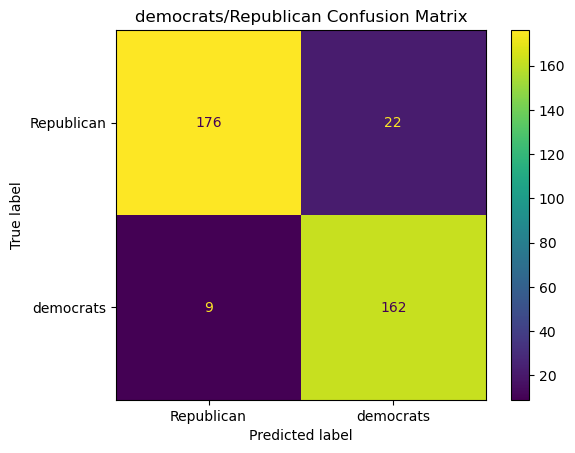

In [24]:
# Calculate predictions, output confusion matrix

preds = big_pipe.predict(X_test)
ConfusionMatrixDisplay.from_estimator(big_pipe, X_test, y_test)
plt.title('democrats/Republican Confusion Matrix');

#### Observation
The production model is 92% accurate on the test data having roughly twice as many false Democrat predictions as Republican predictions. There are two users whom have posted to both subreddits which may account for, at least some of, the false negatives.   

In [25]:
# Calculate Classification Metrics

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print(f'Train Score: {big_pipe.score(X_train, y_train).round(3)}')
print(f'Test Score: {big_pipe.score(X_test, y_test).round(3)}')
print(f'Accuracy: {accuracy_score(y_test, preds).round(3)}')
print(f'Specificity: {(tn / (tn + fp)).round(3)}')
print(f'Recall: {recall_score(y_test, preds, pos_label = "democrats").round(3)}')
print(f'Precision: {precision_score(y_test, preds, pos_label = "democrats").round(3)}')
print(f'F1: {f1_score(y_test, preds, pos_label = "democrats").round(3)}')

Train Score: 0.977
Test Score: 0.916
Accuracy: 0.916
Specificity: 0.889
Recall: 0.947
Precision: 0.88
F1: 0.913


#### Observation
The production model is slightly more sensitve than specific resulting in a model that predicts actual positives (democrats) slightly better than actual negatives (Republican). 

In [26]:
# Generate prediction dataframe

pred_df = pd.DataFrame(
    big_pipe.predict_proba(X_test),
    columns=['p(Republican)', 'p(democrats)'])

pred_df['true_values'] = y_test.values

pred_df.head()

,p(Republican),p(democrats),true_values
0,0.023705,9.762950e-01,democrats
1,0.999999,9.863304e-07,Republican
2,0.003478,9.965223e-01,democrats
3,0.002043,9.979569e-01,democrats
4,0.999034,9.663174e-04,Republican


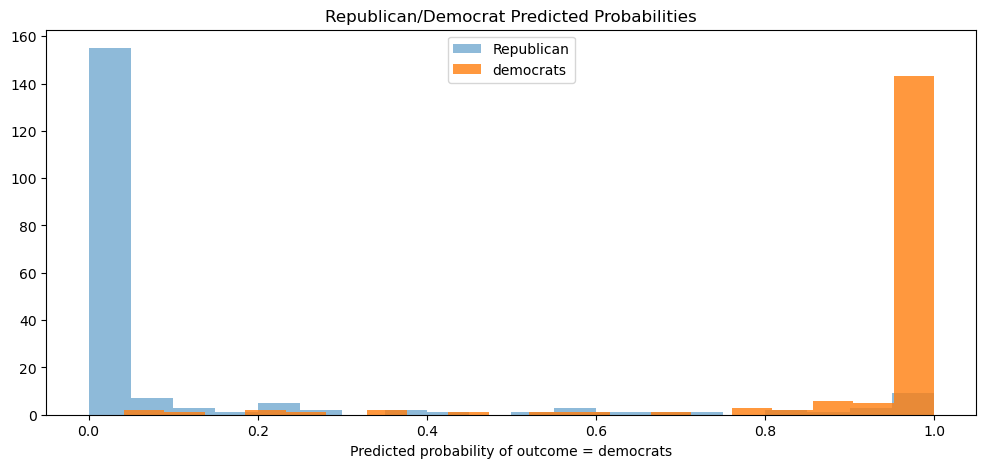

In [27]:
# Generate Histogram of predicted probabilities

plt.figure(figsize = (12, 5))

rep_sub = pred_df[pred_df['true_values'] == 'Republican']
plt.hist(rep_sub['p(democrats)'], label = 'Republican', bins = 20, alpha = .5)

dem_sub = pred_df[pred_df['true_values'] == 'democrats']
plt.hist(dem_sub['p(democrats)'], label='democrats', bins=20, alpha=.8)

plt.xlabel('Predicted probability of outcome = democrats')
plt.title('Republican/Democrat Predicted Probabilities')
plt.legend();

#### Observation
This histogram illustrates the 92% accuracy score of the model with the vast majority of each class on their respective sides with 'Republican' faring slightly worse than 'democrat'.  

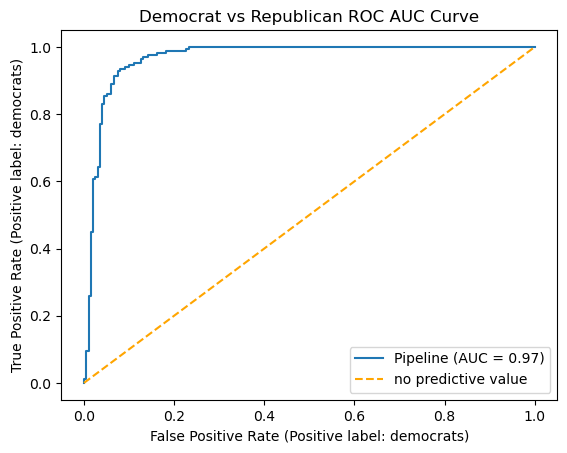

In [28]:
# Generate ROC AUC curve with 50% line
RocCurveDisplay.from_estimator(big_pipe, X_test, y_test)

plt.plot([0, 1], [0, 1],
        label = 'no predictive value',
        linestyle = '--',
        color = 'orange')
plt.title('Democrat vs Republican ROC AUC Curve')
plt.legend();

#### Observation
An ROC AUC score of 0.97 illustrates that our positive (democrats) and negative (Republican) classes are nearly perfectly seperated; much like we see in the media today.

# Conclusions and Recommendations

**Conclusions:** Performing EDA on the scraped data confirmed some assumptions I already had.  First, we as as population are heavily divided along partisan lines with only two users in this dataset choosing to explore the 'other side'.  Second, media outlets tend to cater to one side of the political spectrum or the other with zero overlap between Republican and Democrat media sources.  It is fairly safe to assume that this stark division in the media may be, at least partially, at fault for the growing division in the population.

By comparing three models, with two different transformers, then iterating over hyper-parameters to optimize accuracy, a nearly 75% accuracy rate was achieved by modeling the news article titles alone.  In a world with a purely objective, un-biased media one could assume accuracy would be 50%, given a dataset with equal representation from both sides of the political spectrum ie. the base case.  When news source was added to the model pipeline, accuracy increased to 92%.  Given this dataset, and the current media landscape, a simple list of right-leaning media versus left-leaning media would yield 100% accuracy rate.

**Recommendations:**As opposed to having just two classes, left versus right, it may be more useful to use sentiment analysis on the 'titles' to quantify how different media outlets report on the same events.  With this information it may be possible to map a spectrum of political leanings, far left to far right, and everything in between.  